# 主成分分析

主成分分析は次元削減のためのテクニックです。可能な限りデータの分散を保ちながら、多次元のデータを低次元に変換します。 

モノクロの画像を考えてみると、各点のX座標とY座標と明るさ、３次元ののデータがあります。これを２次元のデータに変換することは、画像圧縮や顔認識で役に立ちます。

サンプルを用いてこれを試してみましょう。scikit-learnに付属しているIrisデータセットを用います。３品種のアヤメの花が、４次元のデータで表されています。すなわち、それぞれの花のpetalとsepalの幅と長さです。データを読み込み、観察してみるところから始めましょう。

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()

numSamples, numFeatures = iris.data.shape
print numSamples
print numFeatures
print list(iris.target_names)

150
4
['setosa', 'versicolor', 'virginica']


以上から、データセットが150のサンプル（それぞれの花）を持っていることが分かります。４次元のデータですが、今回はそれを特徴と呼びます。アヤメの品種は、３種類です。

２次元や３次元のデータは可視化しやすいのですが、４次元のデータを可視化することは我々の脳にはできません。従って、２次元に削減してみましょう。

In [2]:
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

２つの直行した４次元ベクトルを２次元に投射することで、４次元のデータを２次元に削減することができました。その４次元のベクトルを見ることができますが、今回はこれについて頭を悩ませる必要はありません。

In [3]:
print pca.components_

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]


どれだけの情報を保存できているのか、確認してみましょう。

In [4]:
print pca.explained_variance_ratio_
print sum(pca.explained_variance_ratio_)

[ 0.92461621  0.05301557]
0.977631775025


いい感じですね。４次元から２次元分削減した訳ですが、主成分分析は上手に２つの次元を残しています。一つの次元がデータの分散の92%を捉えており、二つ目の次元が5%を捉えています。２次元に削減することで、データの分散の3%未満しか失っていません。

それでは、データを２次元でプロットしてみましょう。

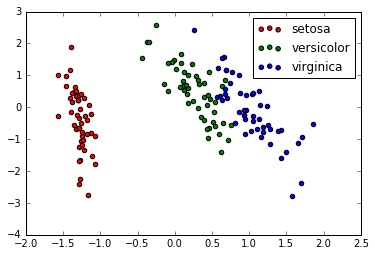

In [6]:
%matplotlib inline
from pylab import *

colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
        c=c, label=label)
pl.legend()
pl.show()
    

３つの異なるあやめの品種が、次元削減されたにも関わらず上手に分類されていることを確認することができます。これが上手に機能する理由は、個々の花のpetalとsepalのサイズが、花の全体のサイズが大きくなるにつれて同じ割合で大きくなるためと考えられます。このグラフ上の数値に直感的な意味はありませんが、おそらくpetalとsepalの幅と高さの割合を見ているのでしょう。主成分分析により、次元削減に成功したことになります。

## アクティビティ

今回の結果は、データを１次元に削減しても分散のほとんどが保持可能であることを示唆しています。主成分分析による１次元への次元削減を試みて、結果を確認してみましょう。